# Importy


In [ ]:
import requests
from bs4 import BeautifulSoup
from time import sleep
import pandas as pd
import json
import seaborn as sns

# Scrapping

In [ ]:
page_number = 1
url = f'https://www.otodom.pl/pl/wyniki/sprzedaz/mieszkanie/slaskie/katowice/katowice/katowice?viewType=listing&limit=72&page={page_number}'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

In [ ]:
response = requests.get(url,
                        headers=headers)

In [ ]:
content = response.text

In [ ]:
soup = BeautifulSoup(content, 'html.parser')

In [ ]:
print(soup.prettify())

In [ ]:
offers = soup.find_all('li', {'class': 'css-o9b79t e1dfeild0'})

In [ ]:
len(offers)

76

In [ ]:
offer = offers[0]

In [ ]:
print(offer.prettify())

In [ ]:
url = 'https://www.otodom.pl' + offer.find('a', {'data-cy': 'listing-item-link'})['href']

In [ ]:
url

'https://www.otodom.pl/pl/oferta/apartament-recepcja-klimatyzacja-2-lazienki-ID4n37E'

In [ ]:
details = offer.find('div', {'class': 'e1jyrtvq0 css-1tjkj49 ei6hyam0'}).find_all('span', {'class': 'css-1cyxwvy ei6hyam2'})

In [ ]:
price = int(details[0].get_text().replace('\xa0','').replace('zł',''))

In [ ]:
area = float(details[3].get_text().replace(' m²',''))

In [ ]:
rooms = int(details[2].get_text().split()[0])

In [ ]:
details[2].get_text().split()[0]

'3'

In [ ]:
district = offer.find('p',{'class': 'css-19dkezj e1n06ry53'}).get_text().split(', ')[-3]

In [ ]:
district

'Wełnowiec-Józefowiec'

In [ ]:
data = []

for offer in offers:
  try:
    url = 'https://www.otodom.pl' + offer.find('a', {'data-cy': 'listing-item-link'})['href']
  except:
    continue
  try:
    details = offer.find('div', {'class': 'e1jyrtvq0 css-1tjkj49 ei6hyam0'}).find_all('span', {'class': 'css-1cyxwvy ei6hyam2'})
  except:
    continue
  try:
    price = int(details[0].get_text().replace('\xa0','').replace('zł',''))
  except:
    price = None
  try:
    area = float(details[3].get_text().replace(' m²',''))
  except:
    area = None
  try:
    rooms = int(details[2].get_text().split()[0])
  except:
    rooms = None
  try:
    district = offer.find('p',{'class': 'css-19dkezj e1n06ry53'}).get_text().split(', ')[-3]
  except:
    district = None
  data.append({'url': url,
               'price': price,
               'area': area,
               'rooms': rooms,
               'district': district})

In [ ]:
data[0]

{'url': 'https://www.otodom.pl/pl/oferta/apartament-recepcja-klimatyzacja-2-lazienki-ID4n37E',
 'price': 790500,
 'area': 93.12,
 'rooms': 3,
 'district': 'Wełnowiec-Józefowiec'}

In [ ]:
data = []

for page_number in range(1,50):
  url = f'https://www.otodom.pl/pl/wyniki/sprzedaz/mieszkanie/slaskie/katowice/katowice/katowice?viewType=listing&limit=72&page={page_number}'
  headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
  response = requests.get(url,
                        headers=headers)
  content = response.text
  sleep(3)
  print(f'Obtained data from page {page_number}')
  soup = BeautifulSoup(content, 'html.parser')
  offers = soup.find_all('li', {'class': 'css-o9b79t e1dfeild0'})

  for offer in offers:
    try:
      url = 'https://www.otodom.pl' + offer.find('a', {'data-cy': 'listing-item-link'})['href']
    except:
      continue
    try:
      details = offer.find('div', {'class': 'e1jyrtvq0 css-1tjkj49 ei6hyam0'}).find_all('span', {'class': 'css-1cyxwvy ei6hyam2'})
    except:
      continue
    try:
      price = int(details[0].get_text().replace('\xa0','').replace('zł',''))
    except:
      price = None
    try:
      area = float(details[3].get_text().replace(' m²',''))
    except:
      area = None
    try:
      rooms = int(details[2].get_text().split()[0])
    except:
      rooms = None
    try:
      district = offer.find('p',{'class': 'css-19dkezj e1n06ry53'}).get_text().split(', ')[-3]
    except:
      district = None
    data.append({'url': url,
                'price': price,
                'area': area,
                'rooms': rooms,
                'district': district})

Obtained data from page 1
Obtained data from page 2
Obtained data from page 3
Obtained data from page 4
Obtained data from page 5
Obtained data from page 6
Obtained data from page 7
Obtained data from page 8
Obtained data from page 9
Obtained data from page 10
Obtained data from page 11
Obtained data from page 12
Obtained data from page 13
Obtained data from page 14
Obtained data from page 15
Obtained data from page 16
Obtained data from page 17
Obtained data from page 18
Obtained data from page 19
Obtained data from page 20
Obtained data from page 21
Obtained data from page 22
Obtained data from page 23
Obtained data from page 24
Obtained data from page 25
Obtained data from page 26
Obtained data from page 27
Obtained data from page 28
Obtained data from page 29
Obtained data from page 30
Obtained data from page 31
Obtained data from page 32
Obtained data from page 33
Obtained data from page 34
Obtained data from page 35
Obtained data from page 36
Obtained data from page 37
Obtained d

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.to_csv('otodom.csv')

In [ ]:
df

,url,price,area,rooms,district
0,https://www.otodom.pl/pl/oferta/5-pokojowe-mie...,1904773.0,161.24,5.0,Koszutka
1,https://www.otodom.pl/pl/oferta/mieszkanie-3-p...,364000.0,45.00,3.0,Giszowiec
2,https://www.otodom.pl/pl/oferta/nowe-gotowe-mi...,520000.0,43.60,2.0,Brynów-Osiedle Zgrzebnioka
3,https://www.otodom.pl/pl/oferta/atrakcyjne-mie...,598000.0,73.40,4.0,Załęska Hałda-Brynów
4,https://www.otodom.pl/pl/oferta/3-pokoje-60-92...,603108.0,60.92,3.0,Wełnowiec-Józefowiec
...,...,...,...,...,...
3607,https://www.otodom.pl/pl/oferta/apartament-z-k...,679000.0,90.57,3.0,Śródmieście
3608,https://www.otodom.pl/pl/oferta/ligota-mieszka...,342000.0,54.30,2.0,Ligota-Panewniki
3609,https://www.otodom.pl/pl/oferta/inwestycja-w-k...,560560.0,57.20,3.0,Wełnowiec-Józefowiec
3610,https://www.otodom.pl/pl/oferta/mieszkania-w-k...,445848.0,42.87,3.0,Wełnowiec-Józefowiec


In [ ]:
print(soup.prettify())

In [ ]:
data_json = soup.find('script', {'id':"__NEXT_DATA__"}).get_text()

In [ ]:
data_json_parsed = json.loads(data_json)

In [ ]:
data_json_parsed.keys()

dict_keys(['props', 'page', 'query', 'buildId', 'assetPrefix', 'runtimeConfig', 'isFallback', 'dynamicIds', 'gssp', 'customServer', 'appGip', 'scriptLoader'])

In [ ]:
data_json_parsed['props']['pageProps']['data']['searchAds']['items']

# EDA

In [ ]:
df = pd.read_csv('otodom.csv')

In [ ]:
df = df.drop(df.columns[0], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   url       3612 non-null   object 
 1   price     2687 non-null   float64
 2   area      3612 non-null   float64
 3   rooms     3610 non-null   float64
 4   district  3611 non-null   object 
dtypes: float64(3), object(2)
memory usage: 141.2+ KB


In [ ]:
df.describe()

,price,area,rooms
count,2.687000e+03,3612.000000,3610.000000
mean,5.861604e+05,260.938638,2.578670
std,2.996140e+05,12034.035461,0.987895
min,8.588800e+04,12.700000,1.000000
25%,4.098580e+05,42.640000,2.000000
50%,5.206820e+05,53.250000,2.000000
75%,6.804535e+05,71.377500,3.000000
max,4.050000e+06,723303.000000,9.000000


In [ ]:
!pip install pandas_profiling --upgrade
!pip install markupsafe==2.0.1

In [ ]:
from pandas_profiling import ProfileReport

<ipython-input-11-e2a33329b6f0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
from pandas._libs.lib import infer_dtype
prof = ProfileReport(df, infer_dtypes=False)

In [ ]:
prof.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df = df.drop_duplicates()
df = df[df['price'].notnull()]

In [ ]:
price_95 = df['price'].quantile(0.95)

In [ ]:
df = df[df['price'] <= price_95]

In [ ]:
area_95 = df['area'].quantile(0.95)

In [ ]:
df = df[df['area'] <= area_95]

In [ ]:
prof = ProfileReport(df, infer_dtypes=False)
prof.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

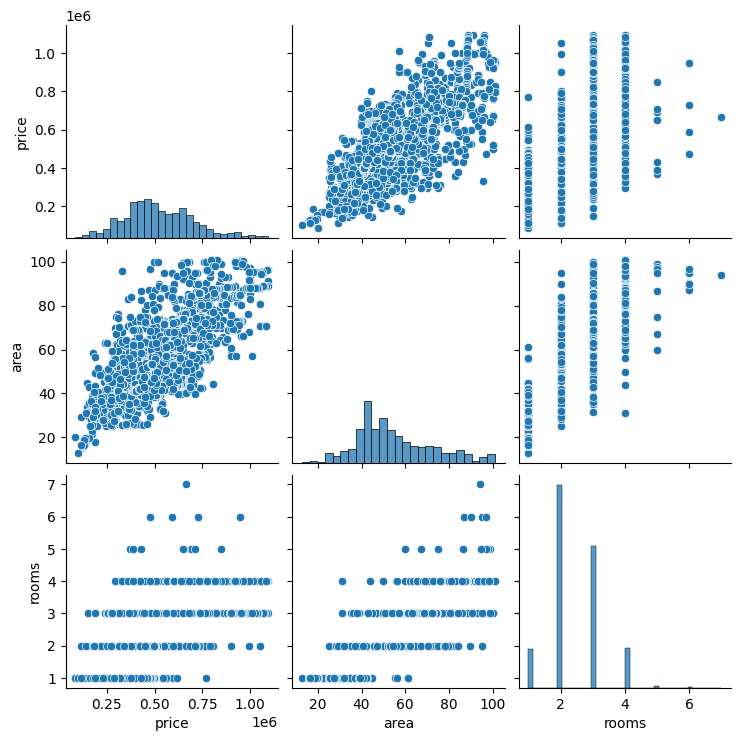

In [ ]:
sns.pairplot(df)

<ipython-input-26-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

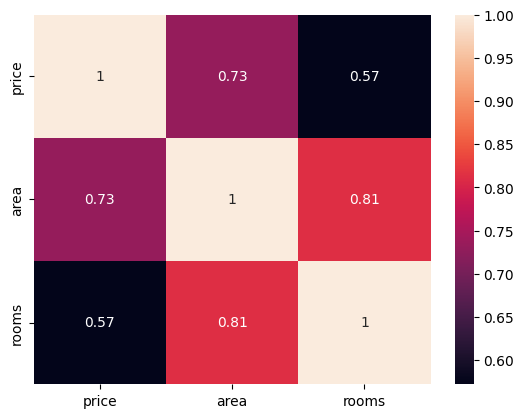

In [ ]:
sns.heatmap(df.corr(), annot=True)

<Axes: >

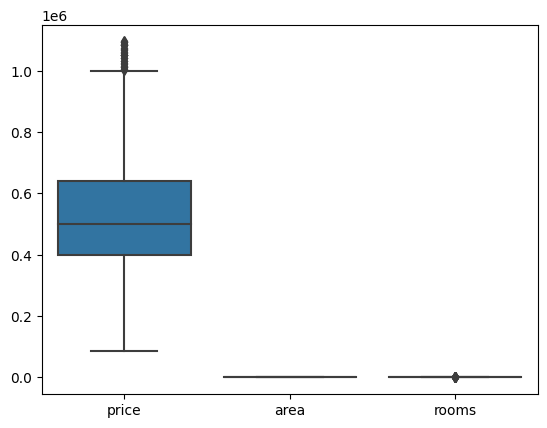

In [ ]:
sns.boxplot(df)

In [ ]:
df_std = (df - df.mean()) / df.std()

<ipython-input-28-7c27e3b245df>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_std = (df - df.mean()) / df.std()
<ipython-input-28-7c27e3b245df>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_std = (df - df.mean()) / df.std()


<Axes: >

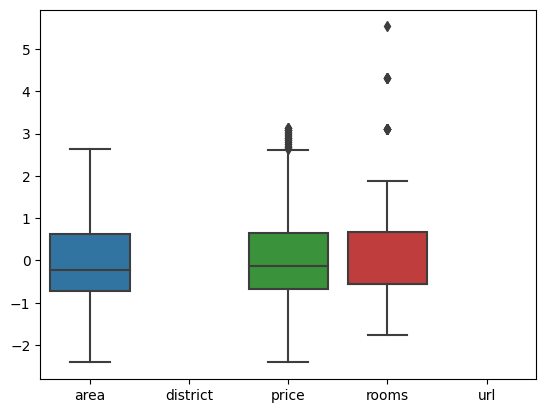

In [ ]:
sns.boxplot(df_std)

# Model

In [ ]:
X = df[['area', 'rooms']]
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV

In [ ]:
dtr = DecisionTreeRegressor()

In [ ]:
params = {'max_depth': np.arange(10,16),
          'min_samples_split': np.arange(60,81,1),
          'min_samples_leaf': np.arange(10,31,1)}

In [ ]:
np.arange(1,10,5)

array([1, 6])

In [ ]:
gs = GridSearchCV(dtr,
                  param_grid = params,
                  cv = 10,
                  verbose = 3)

In [ ]:
gs.fit(X_train, y_train)

In [ ]:
gs.best_estimator_

DecisionTreeRegressor(max_depth=11, min_samples_leaf=17, min_samples_split=66)

In [ ]:
gs.best_params_

{'max_depth': 11, 'min_samples_leaf': 17, 'min_samples_split': 66}

In [ ]:
gs.best_score_

0.5721363941580017

In [ ]:
gs.score(X_test, gs.predict(X_test))

1.0

In [ ]:
gs.score(gs.predict(X_test), y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


ValueError: ignored

In [ ]:
gs.predict(X_test)

array([327148.82758621, 358554.54545455, 493736.8125    , 531563.45783133,
       218947.88235294, 390639.69444444, 475117.14634146, 475117.14634146,
       309313.21052632, 535308.859375  , 266705.36206897, 705740.68292683,
       327148.82758621, 218947.88235294, 266705.36206897, 436439.10204082,
       468607.36956522, 745785.49019608, 470331.37735849, 591488.3       ,
       493736.8125    , 218947.88235294, 470627.9       , 728925.10769231,
       468607.36956522, 436439.10204082, 498537.22857143, 409042.91176471,
       468607.36956522, 411375.76923077, 498537.22857143, 565179.85416667,
       475117.14634146, 728925.10769231, 835405.76470588, 483083.8       ,
       218947.88235294, 358554.54545455, 309313.21052632, 591488.3       ,
       535308.859375  , 534786.23333333, 420940.05555556, 565179.85416667,
       468607.36956522, 411375.76923077, 218947.88235294, 423448.63636364,
       591105.03846154, 543189.50819672, 218947.88235294, 351831.27777778,
       459969.15789474, 7

In [ ]:
y_test

2097    459606.0
635     420000.0
1808    472200.0
48      499000.0
1771    247500.0
          ...   
2374    879525.0
2143    428065.0
2360    694638.0
2298    430000.0
3460    404769.0
Name: price, Length: 461, dtype: float64